# 01. Знакомство с `torch.Tensor`

V 0.1 04.02.2021

In [2]:
pip install torch

---

При решении данных задач не подразумевается использования циклов или генераторов Python, если в задании не сказано обратного. Решение должно опираться на использование функционала библиотеки `torch`.

[PyTorch documentation](https://pytorch.org/docs/stable/#pytorch-documentation)

In [3]:
import torch

## 1.1 Создание тензоров и выполнение базовых операций над ними

[Документация по функциям для создания тензоров](https://pytorch.org/docs/stable/torch.html#creation-ops)

[Документация по функциям для работы с индексами](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

1.1.1 Создайте двумерный тензор размера (8, 8). Используя как можно меньше операций, добейтесь расстановки кодов "шахматных фигур".

Ожидаемый результат:

```
[[-4., -3., -2., -6., -5., -2., -3., -4.],
 [-1., -1., -1., -1., -1., -1., -1., -1.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [1., 1., 1., 1., 1., 1., 1., 1.],
 [4., 3., 2., 6., 5., 2., 3., 4.]]

```

In [4]:
import torch

x = torch.zeros(4, 8)
y = torch.ones(1, 8)
z = -torch.ones(1, 8).squeeze()
a = torch.Tensor([4, 3, 2, 6, 5, 2, 3, 4])
b = -torch.Tensor([4, 3, 2, 6, 5, 2, 3, 4])
t = torch.stack((b, z))
t = torch.cat((t, x), dim=0)
t = torch.cat((t, y), dim=0)

# Преобразуйте `a` в двумерный тензор с размерностью (1, 8)
a = a.unsqueeze(dim=0)

# Теперь можно объединить `t` и `a` вертикально
result = torch.cat((t, a), dim=0)

print(result)


tensor([[-4., -3., -2., -6., -5., -2., -3., -4.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 4.,  3.,  2.,  6.,  5.,  2.,  3.,  4.]])


1.1.2 Средствами `torch` рассчитать произведения четных чисел от 2 до 20 на ближайшие к ним бОльшие нечетные числа.

In [5]:
import torch

# Создаем тензор с четными числами от 2 до 20
even_numbers = torch.arange(2, 21, 2)

# Вычисляем ближайшие к четным числам большие нечетные числа
closest_odd_numbers = (even_numbers + 1)

# Вычисляем произведения
products = even_numbers * closest_odd_numbers

# Выводим результат
print(products)


tensor([  6,  20,  42,  72, 110, 156, 210, 272, 342, 420])


1.1.3 Создать тензор размера 11x7 вида: [[1, 2, 3, ..., 7], [11, 12, 13, ..., 17], [21, 22, 23, ..., 27], ..., [101, 102, 103, ..., 107]]

In [6]:


tensor = torch.arange(1, 107, 10).unsqueeze(1) + torch.arange(0, 7)

print(tensor)


tensor([[  1,   2,   3,   4,   5,   6,   7],
        [ 11,  12,  13,  14,  15,  16,  17],
        [ 21,  22,  23,  24,  25,  26,  27],
        [ 31,  32,  33,  34,  35,  36,  37],
        [ 41,  42,  43,  44,  45,  46,  47],
        [ 51,  52,  53,  54,  55,  56,  57],
        [ 61,  62,  63,  64,  65,  66,  67],
        [ 71,  72,  73,  74,  75,  76,  77],
        [ 81,  82,  83,  84,  85,  86,  87],
        [ 91,  92,  93,  94,  95,  96,  97],
        [101, 102, 103, 104, 105, 106, 107]])


1.1.4 Написать функцию, которая для целых значений `n` и `m` будет возвращать тензор размера `n`x`m`, заполненный текстурой размера 2x2, состоящей из следующих значений:

```
0 1

2 3

```

Пример для n = 4 и m = 5:

```
0 1 0 1 0

2 3 2 3 2

0 1 0 1 0

2 3 2 3 2
```

In [7]:
n = 5
m = 5
res = torch.arange(0,4).reshape(2,2).repeat(n//2,m//2)
if n % 2 != 0:
        res = torch.cat((res, res[0].unsqueeze(0)), dim=0)
if m % 2 != 0:
        res = torch.cat((res, res[:,0].unsqueeze(1)), dim=1)


res

tensor([[0, 1, 0, 1, 0],
        [2, 3, 2, 3, 2],
        [0, 1, 0, 1, 0],
        [2, 3, 2, 3, 2],
        [0, 1, 0, 1, 0]])

1.1.5 Сгенерировать двумерный тензор `t` размерности (4, 7), состоящий из случайных действительных чисел, равномерно распределенных в дипазоне от 0 до 20. Нормализовать значения массива с помощью преобразования вида $ax+b$ так, что после нормализации максимальный элемент масива будет равен 1.0, минимальный 0.0

In [8]:
t = 20 * torch.rand(4, 7)
max_value = t.max()
min_value = t.min()

a = 1.0 / (max_value - min_value)
b = -min_value / (max_value - min_value)

normalized_t = a * t + b

print(normalized_t)

tensor([[ 6.8447e-01,  1.7627e-01,  4.0183e-01,  1.3693e-01,  1.1396e-02,
          6.5002e-01,  4.0259e-01],
        [ 5.4643e-01,  9.2757e-01,  2.0082e-01,  1.0803e-01,  7.3211e-01,
          5.2770e-01,  7.5719e-01],
        [ 8.1706e-01,  2.2625e-01,  5.8086e-01,  1.0000e+00, -3.7253e-09,
          9.5423e-02,  6.4698e-01],
        [ 3.7816e-01,  6.5975e-01,  9.5407e-01,  7.6009e-02,  5.1172e-01,
          7.4449e-01,  7.0815e-01]])


In [9]:
t

tensor([[13.9014,  4.3747,  8.6031,  3.6373,  1.2839, 13.2557,  8.6173],
        [11.3137, 18.4585,  4.8349,  3.0955, 14.7946, 10.9626, 15.2647],
        [16.3870,  5.3117, 11.9591, 19.8164,  1.0703,  2.8591, 13.1986],
        [ 8.1594, 13.4380, 18.9553,  2.4952, 10.6631, 15.0265, 14.3454]])

[Random Sampling](https://pytorch.org/docs/stable/torch.html#random-sampling)

[Distributions](https://pytorch.org/docs/stable/distributions.html)

1.1.6 Задать два двумерных тензора `ar1` и `ar2` размерности (4, 7), состоящих из случайных целых чисел в пределах от 0 до 10. Построить двумерный тензор размерности (4, 7), каждый элемент которого представляет собой максимум из двух значений, находящихся на аналогичной позиции в массивах `ar1`, `ar2`.

[Reductions ops](https://pytorch.org/docs/stable/torch.html#reduction-ops)

In [10]:
ar1 = 10 * torch.rand(4, 7)
ar2 = 10 * torch.rand(4, 7)

In [11]:
ar1

tensor([[7.0971, 2.0732, 7.7886, 9.0195, 5.9766, 2.8533, 0.1598],
        [1.6259, 7.1672, 1.2708, 8.7894, 4.8517, 2.1046, 8.0877],
        [8.6266, 0.1212, 2.2745, 0.5758, 9.8931, 7.8737, 0.5676],
        [0.3620, 9.3388, 8.8318, 3.3410, 8.7021, 4.6702, 1.7883]])

In [12]:
ar2

tensor([[7.3522, 6.4424, 9.2523, 1.3107, 9.6446, 5.7742, 6.1720],
        [4.1142, 8.6577, 7.9530, 4.3631, 8.2431, 0.8950, 0.8403],
        [9.8396, 1.7895, 4.5482, 4.8309, 7.1561, 4.8565, 4.5575],
        [7.5299, 7.0935, 9.2743, 0.2984, 7.7146, 4.4459, 2.6062]])

In [13]:
torch.max(ar1,ar2)

tensor([[7.3522, 6.4424, 9.2523, 9.0195, 9.6446, 5.7742, 6.1720],
        [4.1142, 8.6577, 7.9530, 8.7894, 8.2431, 2.1046, 8.0877],
        [9.8396, 1.7895, 4.5482, 4.8309, 9.8931, 7.8737, 4.5575],
        [7.5299, 9.3388, 9.2743, 3.3410, 8.7021, 4.6702, 2.6062]])

1.1.7 Создать тензор из 20 случайных целых чисел от 0 до 100. Получить второе сверху значение в тензоре. Определить индекс этого значения.

In [14]:
ar = torch.randint(0, 101, (20,))

# Получаем второе сверху значение в тензоре
second_highest_value = ar.topk(2).values[-1]

# Определяем индекс второго сверху значения
index_of_second_highest_value = (ar == second_highest_value).nonzero().item()


In [15]:
ar

tensor([ 30, 100,  60,  88,   4,  64,  13,  58,  34,  62,   0,  79,  13,  70,
         48,  21,  50,  68,  63,  82])

In [16]:
second_highest_value

tensor(88)

In [17]:
index_of_second_highest_value

3

## 1.2 Распространение

[Numpy broadcasting](https://numpy.org/devdocs/user/theory.broadcasting.html)

[Torch broadcasting](https://pytorch.org/docs/stable/notes/broadcasting.html)

1.2.1 Создать тензор 11x7 вида: `[[1, 2, 3, ..., 7], [11, 12, 13, ..., 17], [21, 22, 23, ..., 27], ..., [101, 102, 103, ..., 107]]`. При решении задачи применить технику распространения.

In [18]:
tensor = torch.arange(1, 107, 10).unsqueeze(1) + torch.arange(0, 7)

print(tensor)

tensor([[  1,   2,   3,   4,   5,   6,   7],
        [ 11,  12,  13,  14,  15,  16,  17],
        [ 21,  22,  23,  24,  25,  26,  27],
        [ 31,  32,  33,  34,  35,  36,  37],
        [ 41,  42,  43,  44,  45,  46,  47],
        [ 51,  52,  53,  54,  55,  56,  57],
        [ 61,  62,  63,  64,  65,  66,  67],
        [ 71,  72,  73,  74,  75,  76,  77],
        [ 81,  82,  83,  84,  85,  86,  87],
        [ 91,  92,  93,  94,  95,  96,  97],
        [101, 102, 103, 104, 105, 106, 107]])


1.2.2 Вычесть одномерный тензор `b_1d` из двухмерного тензора `a_2d`, так, чтобы каждый элемент одномерного тензора вычитался из всех элементов соответствующих строк двумерного тензора.

_Пример:_

Для входа:
```python
a_2d = np.array([[3,3,3],[4,4,4],[5,5,5]])
b_1d = np.array([1,2,3])
```

Ожидается резульат:

```python
[[2 2 2]
 [2 2 2]
 [2 2 2]]
```

In [19]:
a_2d = torch.Tensor([[3,3,3],[4,4,4],[5,5,5]])
b_1d = torch.Tensor([1,2,3])

In [20]:
a_2d-b_1d.unsqueeze(1)

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

## 1.3 Индексы, маскирование и прихотливое индексирование

[Документация по функциям для работы с индексами](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

1.3.1 Получить индексы, для которых элементы тензоров `a` и `b` совпадают.

_Пример:_

Для входа:
```python
a = np.array([1,2,3,2,3,4,3,4,5,6])
b = np.array([7,2,10,2,7,4,9,4,9,8])
```

Ожидается резульат:

```python
array([1, 3, 5, 7])
```

In [21]:
a = torch.Tensor([1,2,3,2,3,4,3,4,5,6])
b = torch.Tensor([7,2,10,2,7,4,9,4,9,8])

In [22]:
((a==b)==True).nonzero().squeeze()

tensor([1, 3, 5, 7])

1.3.2 Инвертировать порядок элементов в двумерном тензоре `torch.arange(9).view(3,3)`.

Ожидаемый результат:


```python
array([[8, 7, 6],
       [5, 4, 3],
       [2, 1, 0]])
```

In [23]:
torch.flip(torch.arange(9).view(3,3),(1,0))

tensor([[8, 7, 6],
        [5, 4, 3],
        [2, 1, 0]])

1.3.3 Из входного тензора a получить только элементы, находящиеся в диапазоне от 5 до 10.

_Пример:_

Для входа:
```python
a = np.array([2, 6, 1, 9, 10, 3, 27])
```

Ожидается резульат:

```python
array([6, 9, 10])
```

In [24]:
a = torch.Tensor([2, 6, 1, 9, 10, 3, 27])

In [25]:
a[a < 10][a[a < 10] < 5]

tensor([2., 1., 3.])

1.3.4 Поменять местами столбец 1 и 2 тензора `np.arange(9).reshape(3,3)`

In [26]:
t = torch.arange(9).reshape(3,3)
t

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [27]:
t[:,2:3]

tensor([[2],
        [5],
        [8]])

In [28]:
tt = torch.clone(t[:,1:2])

In [29]:
tt

tensor([[1],
        [4],
        [7]])

In [30]:
t[:,1:2] = t[:,2:3]

In [31]:
tt

tensor([[1],
        [4],
        [7]])

In [32]:
t[:,2:3]=tt

In [33]:
t

tensor([[0, 2, 1],
        [3, 5, 4],
        [6, 8, 7]])

1.3.5 Создать тензор 8 на 10 из случайных целых чисел из диапазона от 0 до 10 и найти в ней строку (ее индекс и вывести саму строку), в которой сумма значений минимальна.

In [34]:
t = torch.randint(10,(8,10))
t

tensor([[7, 9, 6, 4, 7, 6, 0, 0, 2, 7],
        [6, 7, 6, 9, 4, 3, 9, 5, 9, 3],
        [1, 0, 7, 2, 7, 8, 9, 5, 3, 1],
        [1, 5, 1, 1, 2, 4, 8, 4, 3, 7],
        [5, 2, 7, 8, 1, 8, 9, 9, 5, 7],
        [7, 4, 2, 2, 1, 2, 4, 6, 2, 3],
        [4, 1, 5, 4, 3, 6, 4, 8, 4, 0],
        [7, 2, 9, 5, 6, 8, 4, 2, 5, 0]])

In [35]:
st = torch.sum(t,1)
st

tensor([48, 61, 43, 36, 61, 33, 39, 48])

In [36]:
ind = torch.argmin(st).item()
ind

5

In [37]:
t[ind]

tensor([7, 4, 2, 2, 1, 2, 4, 6, 2, 3])

1.3.6 Cоздать тензор из 20 случайных целых чисел от 0 до 100. Обрезать значения тензора (заменить значения, выходящие за диапазон, на крайние значения) снизу по значению 30, сверху по значению 70.

In [38]:
t = torch.randint(100,(20,))
t

tensor([ 9, 52,  3, 18, 36, 46, 76, 26, 42,  4, 60, 36, 16, 34, 98, 29, 57,  0,
        72, 63])

In [39]:
t[t<30]=30
t[t>70]=70
t

tensor([30, 52, 30, 30, 36, 46, 70, 30, 42, 30, 60, 36, 30, 34, 70, 30, 57, 30,
        70, 63])

1.3.7 Создать два тензора размера 30 на 3 из случайных целых чисел из диапазона от 0 до 10 и найти все значения первого тензора, которые больше соответсвующих (по расположению) значений второго тензора. Подсчитать сумму этих значений.

In [40]:
t1 = torch.randint(10,(30,3))
t2 = torch.randint(10,(30,3))

In [41]:
t1[t1>t2].sum()

tensor(259)

1.3.8 При помощи прихотливого индексирования для двухмерного массива размерности (20, 20), состоящего из случайных целых чисел в пределах от 0 до 10 получить массив элементов находящихся на диагонали, проходящей над основной диагональю.

In [42]:
t = torch.randint(10,(20,20))
t = t.triu(diagonal=1)

In [43]:
t = t[0:19,1:20]

In [44]:
t

tensor([[9, 0, 1, 4, 2, 2, 3, 9, 3, 1, 7, 8, 5, 9, 3, 6, 4, 8, 6],
        [0, 3, 6, 1, 8, 6, 4, 6, 7, 1, 3, 1, 8, 4, 6, 4, 7, 2, 5],
        [0, 0, 2, 2, 0, 6, 8, 7, 1, 3, 7, 3, 0, 4, 0, 1, 7, 6, 3],
        [0, 0, 0, 1, 8, 5, 6, 9, 3, 4, 3, 0, 7, 2, 5, 1, 5, 7, 0],
        [0, 0, 0, 0, 3, 3, 0, 8, 4, 0, 9, 6, 4, 0, 7, 2, 7, 5, 5],
        [0, 0, 0, 0, 0, 0, 5, 8, 0, 2, 9, 0, 6, 0, 8, 4, 0, 9, 2],
        [0, 0, 0, 0, 0, 0, 1, 0, 4, 3, 1, 6, 1, 7, 2, 0, 7, 2, 7],
        [0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 7, 9, 4, 3, 4, 5, 4, 2, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 7, 1, 1, 0, 5, 3],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 5, 8, 4, 6, 6, 2, 7, 8, 3],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 7, 4, 1, 0, 5, 6, 7],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 5, 3, 2, 6, 2],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 5, 5, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 6, 5, 1, 2, 9],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 5, 4,

In [45]:
t[t.flip(0).flip(1).triu(0)!=0]

tensor([9, 3, 2, 1, 0, 1, 0, 8, 9, 0, 5, 5, 7, 8])

1.3.9 Задать два двухмерных тензора `ar1` и `ar2` размерности (5, 10), состоящих из случайных целых чисел в пределах от 0 до 10. Удвоить все значения `ar1`, которые совпадают со значениями `ar2`, расположенными на аналогичных позициях.

In [46]:
t1 = torch.randint(10,(5,10))
t2 = torch.randint(10,(5,10))

In [47]:
t1

tensor([[0, 3, 2, 5, 3, 7, 0, 9, 1, 9],
        [7, 4, 8, 2, 3, 6, 4, 5, 3, 9],
        [1, 2, 8, 7, 8, 9, 3, 6, 9, 5],
        [6, 9, 7, 5, 0, 1, 0, 7, 7, 5],
        [0, 6, 5, 7, 7, 2, 0, 9, 5, 8]])

In [48]:
t2

tensor([[6, 0, 8, 7, 6, 5, 3, 8, 5, 2],
        [6, 9, 5, 0, 5, 6, 7, 9, 4, 8],
        [2, 0, 8, 7, 4, 7, 4, 5, 6, 4],
        [0, 9, 1, 1, 7, 2, 1, 9, 8, 3],
        [5, 5, 3, 5, 7, 9, 6, 7, 4, 2]])

In [49]:
t1==t2

tensor([[False, False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False,  True, False, False, False, False],
        [False, False,  True,  True, False, False, False, False, False, False],
        [False,  True, False, False, False, False, False, False, False, False],
        [False, False, False, False,  True, False, False, False, False, False]])

In [50]:
t1.where(t1!=t2,t1*2)

tensor([[ 0,  3,  2,  5,  3,  7,  0,  9,  1,  9],
        [ 7,  4,  8,  2,  3, 12,  4,  5,  3,  9],
        [ 1,  2, 16, 14,  8,  9,  3,  6,  9,  5],
        [ 6, 18,  7,  5,  0,  1,  0,  7,  7,  5],
        [ 0,  6,  5,  7, 14,  2,  0,  9,  5,  8]])

1.3.10 Заданы три двухмерных тензора `ar1`, `ar2` и `ar3` размерности (4, 7), состоящие из случайных целых чисел в пределах от 0 до 10. Обнулить все элементы `ar1`, которые больше соответствующих (находящихся в соответствующих позициях) элементов `ar2` и меньше соответствующих элементов `ar3`.

In [51]:
ar1 = torch.randint(0, 11, (4, 7))
ar2 = torch.randint(0, 11, (4, 7))
ar3 = torch.randint(0, 11, (4, 7))
ar1

tensor([[ 1,  5,  6,  0,  8,  3,  4],
        [ 1,  3,  8,  4,  2,  8,  0],
        [10, 10,  3,  8,  4,  3,  5],
        [ 4, 10,  5,  9,  2,  0,  4]])

In [52]:
ar1 = ar1.where((ar1 <= ar2) & (ar1 >= ar3), 0)
ar1

tensor([[0, 0, 0, 0, 0, 0, 0],
        [1, 3, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 3, 5],
        [0, 0, 0, 0, 0, 0, 0]])

1.3.11 Задан двумерный тензор `ar1` размерности (20, 5), состоящий из случайных целых чисел в пределах от 0 до 20. Определить, в каких столбцах не менее 5 раз встречается значение, максимальное по своей строке.

In [53]:
ar1 = torch.randint(0, 21, (20, 5))
ar1

tensor([[14,  9,  8,  3, 15],
        [10, 11,  8, 18,  0],
        [ 1, 16, 18,  0, 12],
        [ 0, 16,  0, 13, 14],
        [13, 14,  3, 10,  3],
        [12, 17,  8, 17,  6],
        [ 8, 17, 15, 11, 11],
        [ 8,  0, 17, 15, 11],
        [ 6, 10,  4, 10,  9],
        [ 6,  6,  4,  6, 17],
        [ 4,  9,  0,  7, 12],
        [ 6,  8, 18, 12, 14],
        [ 1, 14, 19, 14, 15],
        [15, 13, 18,  0, 18],
        [10, 15, 20, 16, 14],
        [ 1, 15,  3, 14, 18],
        [18,  4,  6,  2,  7],
        [ 9,  4, 17, 19,  4],
        [10, 10,  3,  0,  4],
        [20, 20, 19, 11, 11]])

In [54]:
max_values, _ = torch.max(ar1, dim=1)


column_counts = (ar1 == max_values.unsqueeze(1)).sum(dim=0)
columns_with_min_5_max = (column_counts >= 5).nonzero().flatten()

print("Столбцы с максимальным значением не менее 5 раз:")
print(columns_with_min_5_max)

Столбцы с максимальным значением не менее 5 раз:
tensor([1, 2, 4])


1.3.12 Задан двумерный тензор `ar1` размерности (4, 7), состоящий из случайных  чисел в пределах от 0 до 1. Обнулить все значения в массиве, расположенные строго правее и ниже максимального элемента массива.

In [55]:
ar1 = torch.rand(4, 7)
ar1

tensor([[0.9918, 0.9907, 0.0956, 0.9724, 0.9061, 0.6130, 0.0947],
        [0.3668, 0.4706, 0.9620, 0.5820, 0.8599, 0.5981, 0.9705],
        [0.3942, 0.2274, 0.7994, 0.7008, 0.5311, 0.9375, 0.4444],
        [0.7290, 0.4974, 0.9714, 0.7433, 0.7761, 0.6310, 0.0684]])

In [56]:
max_value = ar1.max()
max_indices = torch.where(ar1 == max_value)
print(max_indices)

ar1[max_indices[0]+1:, max_indices[1]+1:] = 0.0

(tensor([0]), tensor([0]))


In [57]:
ar1

tensor([[0.9918, 0.9907, 0.0956, 0.9724, 0.9061, 0.6130, 0.0947],
        [0.3668, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3942, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.7290, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])

1.3.13 Построить "one-hot encoding" для одномерного тензора, содержащего целые числа (длина вектора заранее неизвестна, набор значений заранее неизвестен, при этом в итоговой матрице должны присутствовать столбцы для всех натуральных чисел вплоть до максимального встречающегося в исходном массиве).

Пример:

для тензора `torch.tensor([2, 3, 2, 2, 2, 1])`.

Ожидается результат:

```python
tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])
```

In [58]:
arr = torch.randint(10,(10,))

In [59]:
def one_hot_encoding(arr):
    unique_vals, encoded_arr = torch.unique(arr, return_inverse=True)
    encoded = torch.eye(len(unique_vals))[encoded_arr]
    return encoded

encoded_arr = one_hot_encoding(arr)
print("Исходный массив:")
print(arr)
print("\nOne-hot encoding:")
print(encoded_arr)

Исходный массив:
tensor([0, 8, 3, 7, 4, 9, 8, 5, 1, 6])

One-hot encoding:
tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.]])


1.3.14 Создать тензор `arr` из 20 случайных целых чисел от 0 до 100. Найти самое частое значение в тензоре.
Найти индексы в тензоре, соответствующие самому частому значению. Проверить, как работет алгоритм при двух значениях, имеющих наибольшую встречаемость, предложить приемлемое поведение алгоритма для этого случая.

In [60]:
import torch


arr = torch.randint(0, 101, (1,20))

most_common_value = arr.mode()[0]

indices_of_most_common_value = torch.nonzero(arr == most_common_value).flatten()

print("Тензор arr:", arr)
print("Самое частое значение:", most_common_value)
print("Индексы, соответствующие самому частому значению:", indices_of_most_common_value)



Тензор arr: tensor([[ 36,  74,  58,  86, 100,  73,  67,  59,  71,  90,  57,   1,  58,  30,
           4,  30,  42,  30,  38,  46]])
Самое частое значение: tensor([30])
Индексы, соответствующие самому частому значению: tensor([ 0, 13,  0, 15,  0, 17])


In [61]:
arr_unique = torch.unique(arr)
arr_unique_counts = torch.unique(arr, return_counts = True)[1]

arr_chast_val = arr_unique[arr_unique_counts == arr_unique_counts.max()]
print("Наиболее частые значения:", arr_chast_val)

arr_chast_ind = torch.where(torch.isin(arr, arr_chast_val))[1]
print("Индексы частых значений:", arr_chast_ind)

Наиболее частые значения: tensor([30])
Индексы частых значений: tensor([13, 15, 17])


## 1.4 Математические задачи

1.4.1 Приблизительно (с погрешностью порядка 1%) рассчитать на какой части интервала от 0 до 10 значение функции x * sin(x) больше 0.5.

In [62]:
arr = torch.arange(0,10,0.001)
arr

tensor([0.0000e+00, 1.0000e-03, 2.0000e-03,  ..., 9.9970e+00, 9.9980e+00,
        9.9990e+00])

In [63]:
arr1 = arr*torch.sin(arr)

In [64]:
indices = torch.nonzero(arr1>0.5).flatten()

print(arr[indices].min())
print(arr[indices].max())

tensor(0.7410)
tensor(9.3710)


In [75]:
# Находим индексы, где значение функции больше 0.5
indices = torch.nonzero(arr1 > 0.5).flatten().numpy()

# Разделяем индексы на несколько массивов, где числа идут подряд, с использованием NumPy
split_indices = np.split(indices, np.where(np.diff(indices) != 1)[0] + 1)

# Выводим результат
for group in split_indices:
    min_x = arr[group[0]].item()
    max_x = arr[group[-1]].item()
    print("Интервал x:", min_x, "-", max_x)

Интервал x: 0.7409999966621399 - 2.9719998836517334
Интервал x: 6.361999988555908 - 9.371000289916992


1.4.2 Найти все простые числа в пределах ста. (Для решения предлагается использовать Решето Эратосфена) Использовать не более 1 цикла (желательно).

In [66]:
def sieve_of_eratosthenes(n):
    is_prime = [True] * (n + 1)
    is_prime[0] = is_prime[1] = False  # 0 и 1 не являются простыми числами

    p = 2
    while p ** 2 <= n:
        if is_prime[p]:
            for i in range(p ** 2, n + 1, p):
                is_prime[i] = False
        p += 1

    primes = [i for i in range(2, n + 1) if is_prime[i]]
    return primes

# Вызываем функцию с аргументом 100 (чтобы найти простые числа в пределах ста)
primes_in_range = sieve_of_eratosthenes(100)
print("Простые числа в пределах 100:", primes_in_range)


Простые числа в пределах 100: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


1.4.3 Найти евклидово расстояние между двумя одномерными тензорами одинаковой размерности, не используя готовые решения из библиотек.

In [67]:
import torch

# Создаем два одномерных тензора одинаковой размерности
tensor1 = torch.tensor([1.0, 2.0, 3.0, 4.0])
tensor2 = torch.tensor([5.0, 6.0, 7.0, 8.0])

# Проверяем, что размерности тензоров совпадают
if tensor1.shape != tensor2.shape:
    raise ValueError("Размерности тензоров должны совпадать.")

# Вычисляем разность между тензорами
difference = tensor1 - tensor2

# Возводим каждый элемент разности в квадрат
squared_difference = difference ** 2

# Суммируем все квадраты
sum_of_squared_difference = squared_difference.sum()

# Извлекаем корень квадратный из суммы
euclidean_distance = torch.sqrt(sum_of_squared_difference)

# Выводим результат
print("Евклидово расстояние между тензорами:", euclidean_distance.item())


Евклидово расстояние между тензорами: 8.0


1.4.4 Создать двумерный тензор 20 на 3, содержащий случайные целые числа от 0 до 100.
Интерпретируя тензор как 20 векторов из 3х компонент, отсортировать его по длине векторов.

In [68]:
import torch

# Создаем двумерный тензор размером 20x3 с случайными целыми числами от 0 до 100
tensor = torch.randint(0, 101, (20, 3))

# Вычисляем длину каждого вектора и создаем список индексов для сортировки
vector_lengths = torch.norm(tensor.float(), dim=1)
sorted_indices = torch.argsort(vector_lengths)

# Сортируем тензор по длине векторов
sorted_tensor = tensor[sorted_indices]

# Выводим отсортированный тензор
print("Отсортированный тензор:")
print(sorted_tensor)

Отсортированный тензор:
tensor([[19, 40, 11],
        [25,  1, 63],
        [44, 27, 44],
        [59, 29, 23],
        [38, 24, 56],
        [39, 51, 42],
        [51, 61, 23],
        [10, 78, 33],
        [18, 35, 78],
        [59, 66,  0],
        [87,  4, 20],
        [25, 30, 89],
        [14, 29, 95],
        [31, 94, 31],
        [58, 76, 43],
        [64, 58, 89],
        [ 6, 83, 95],
        [97, 26, 79],
        [38, 85, 91],
        [98, 92, 99]])


1.4.5 Найти "локальные максимумы" в одномерном тензоре (т.е. значения, большие предыдущего и последующего) `torch.tensor([1, 3, 7, 1, 2, 6, 0, 1])` и вывести их индексы.

In [69]:
import torch

# Создаем одномерный тензор
tensor = torch.tensor([1, 3, 7, 1, 2, 6, 0, 1])

# Инициализируем список для хранения индексов локальных максимумов
local_maxima_indices = []

# Проходим по элементам тензора, начиная с индекса 1 и заканчивая индексом n-2 (где n - длина тензора)
for i in range(1, len(tensor) - 1):
    if tensor[i] > tensor[i - 1] and tensor[i] > tensor[i + 1]:
        local_maxima_indices.append(i)

# Выводим индексы локальных максимумов
print("Индексы локальных максимумов:", local_maxima_indices)


Индексы локальных максимумов: [2, 5]


1.4.6 Задан произвольный массив numpy (например массив из 100 случайных числе от 0 до 1). Необходимо найти в нем число наиболее близкое к заданному.

In [70]:
import numpy as np

# Задан произвольный массив numpy
array = np.random.rand(100)  # Пример массива из 100 случайных чисел от 0 до 1

# Заданное значение
target_value = 0.5  # Замените этим значением нужное вам число

# Находим ближайшее число в массиве
closest_value = array[np.abs(array - target_value).argmin()]

# Выводим результат
print("Заданное значение:", target_value)
print("Ближайшее значение в массиве:", closest_value)


Заданное значение: 0.5
Ближайшее значение в массиве: 0.49701441271624713


1.4.7 Решить матричное уравнение `A*X*B=-C` - найти матрицу X. Где `A = [[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]]`, `B=[[3, -1], [2, 1]]`, `C=[[7, 21], [11, 8], [8, 4]]`.

In [71]:
import numpy as np

# Задаем матрицы A, B и C
A = np.array([[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]])
B = np.array([[3, -1], [2, 1]])
C = np.array([[7, 21], [11, 8], [8, 4]])

# Вычисляем обратные матрицы A^(-1) и B^(-1)
A_inv = np.linalg.inv(A)
B_inv = np.linalg.inv(B)

# Вычисляем матрицу X
X = -np.dot(np.dot(A_inv, C), B_inv)

# Выводим результат
print("Матрица X:")
print(X)


Матрица X:
[[ 1.00000000e+00  5.32907052e-16]
 [-2.00000000e+00  1.00000000e+00]
 [ 3.00000000e+00 -4.00000000e+00]]


1.4.8 Проверить, является ли система векторов a1 = (3; −3; 0; 7),
a2 = (2; 2; 4; 7), a3 = (1; 2; 3; 4), a4 = (5; −4; 1; 3) линейно зависимой?

In [72]:
import numpy as np

# Задаем векторы a1, a2, a3, a4
a1 = np.array([3, -3, 0, 7])
a2 = np.array([2, 2, 4, 7])
a3 = np.array([1, 2, 3, 4])
a4 = np.array([5, -4, 1, 3])

# Создаем матрицу, где каждый столбец - это один из векторов
matrix = np.column_stack((a1, a2, a3, a4))

# Вычисляем ранг матрицы
rank = np.linalg.matrix_rank(matrix)

# Проверяем, является ли система векторов линейно зависимой
if rank < len([a1, a2, a3, a4]):
    print("Система векторов линейно зависима.")
else:
    print("Система векторов линейно независима.")


Система векторов линейно зависима.


1.4.9 Сгенирировать тензор из 200 случайных целых чисел, нормально распрделенных cо стандартным отклонением $\sigma = 10$ и матожиданием $\mu = 0$. Построить тензор гистограммы с 20 бинами.

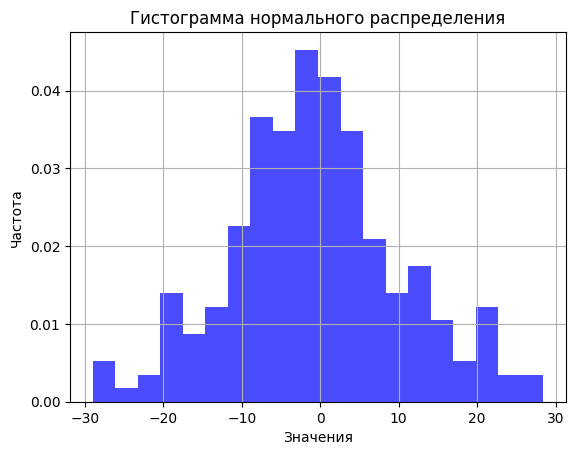

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем параметры нормального распределения
mu = 0  # Математическое ожидание
sigma = 10  # Стандартное отклонение
num_samples = 200  # Количество выборок

# Генерируем случайные числа с нормальным распределением
random_numbers = np.random.normal(mu, sigma, num_samples)

# Строим гистограмму с 20 бинами
plt.hist(random_numbers, bins=20, density=True, alpha=0.7, color='b')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма нормального распределения')
plt.grid(True)
plt.show()
